<a href="https://colab.research.google.com/github/niklaust/Deep_Learning/blob/main/PyTorch_for_Deep_Learning_notebook_of_nikluast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference**
Ian Pointer. (2019). *Programming PyTorch For Deep Learning Creating and Deploying Deep Learning Application*. O'Reilly

github:niklaust

start 20230220

<h1><center><b>Programming PyTorch for Deep Learning</b></center></h1>

## **What is Deep Learning?**

**A machine learning technique** that **uses multiple and numerous layers of nonlinear** transforms to progressively extract features from raw input

**A technique to solve problems** by providing the inputs and desired outputs and letting the computer find the solution, normally **using a neural network.**

# <center><b>Chapter 1. Getting Started with PyTorch</b></center>

**GPU** is The **heart** of every deep learning box. It is going to **power the majority of PyTorch's calculations.**

## **Getting Start with PyTorch!** 

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.rand(2, 2))

True
tensor([[0.8933, 0.0782],
        [0.8609, 0.6029]])


## **Tensors**

A **tensor is both a container for numbers as well as a set of rules** that define transformations between tensors that produce new tensors.

It's easier to think **tensors as multidimensional arrays.**

In [ ]:
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
x

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

Change an element in a tnsor by using standard Python indexing:

In [ ]:
x[0][0] = 5
x

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [ ]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.ones(1,2) + torch.ones(1,2)

tensor([[2., 2.]])

`item`: pull out the value 

In [ ]:
torch.manual_seed(42)

torch.rand(1).item()

0.8822692632675171

`to`: copy between devices 

In [ ]:
import torch

In [ ]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

In [ ]:
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

device(type='cuda', index=0)

### **Tensor Operations**

In [ ]:
torch.manual_seed(42)

a = torch.rand(2,2)
a

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

In [ ]:
print(a.max())             # torch.rand(2,2).max()

tensor(0.9593)


In [ ]:
print(a.max().item())      # torch.rand(2,2).max().item()

0.9593056440353394


`type`: to see the element type in the tensor
`dtype`: to change the type of a tensor

In [ ]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
long_tensor.type()

'torch.LongTensor'

In [ ]:
float_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]]).to(dtype=torch.float32)
float_tensor.type()

'torch.FloatTensor'

appended underscore `_`: save memory, look to see if an in-place function is defined 

In [ ]:
torch.manual_seed(42)

random_tensor = torch.rand(2,2)
random_tensor.log2()

tensor([[-0.1807, -0.1282],
        [-1.3851, -0.0599]])

In [ ]:
random_tensor.log2_()

tensor([[-0.1807, -0.1282],
        [-1.3851, -0.0599]])

**reshape a tensor:**

`view`:  **operates as a view on the original tensor**, so if the underlying data is changed, the view will change too (and vice versa). However, it can throw errors if the required view is not contiguous. It doesn't share the same block of memory it would occupy if a new tensor of  the required shape was created from scratch, you have to call `tensor.contiguous()` before you can use `view()`.

`reshape`: to reshape a tensor

In [ ]:
torch.manual_seed(42)

flat_tensor = torch.rand(784)
print(flat_tensor.shape)                         # 1*28*28 = 784
viewed_tensor = flat_tensor.view(1, 28, 28)
print(viewed_tensor.shape)

torch.Size([784])
torch.Size([1, 28, 28])


In [ ]:
torch.manual_seed(42)

reshaped_tensor = flat_tensor.reshape(1, 28, 28)
print(reshaped_tensor.shape)

torch.Size([1, 28, 28])


In [ ]:
# the reshpaed tensor's shape has to have the same number of 
# total elements as the original. 

try:
  flat_tensor.reshape(3, 28, 28)
except:
  print("RuntimeError: shape '[3, 28, 28]' is invalid for input of size 784")

RuntimeError: shape '[3, 28, 28]' is invalid for input of size 784


**Rearrange the dimensions of a tensor.**

`permute` : rearrange the dimensions of a tensor

You will likely come across this with images, which often are stored as `[height, width, channel]` tensors, but PyTorch prefers to deal with these in a `[channel, height, width]` you can use `permute()` to deal with these in a fairly straightforward manner:

In [ ]:
torch.manual_seed(42)

hwc_tensor = torch.rand(640, 480, 3)            # [height, width, channel]
print(hwc_tensor.shape)
chw_tensor = hwc_tensor.permute(2,0,1)          # [channel, height, width]
print(chw_tensor.shape)

torch.Size([640, 480, 3])
torch.Size([3, 640, 480])


### **Tensor Broadcasting**

Boradcasting allows you to **perform operations between a tensor and a small tensor.** You can broadcast across two tensors if, starting backward from their trailng dimensions:

* The two dimensions are equal.
* One of the dimensions is 1.



# <center><b>Chapter 2. Image Classification with PyTorch</b></center>





## **Our Classification Problem**

Building a simple classifier that can tell the difference between fish and cats.

## **Traditional Challenges**

**Writing a set of rules describing** that a cat has a tail, or that a fish has scales, and **apply those rules to an image to determine**.

We need a lot of pictures of fish and cats. to train the neural network.

We will use ImageNet, a standard collection of images used to train neural networks..

PyTorch needs a way to determine what is a cat and what is a fish. We use a label attached to the data, and training in this manner is called supervised learning.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES=True

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

## **Data Loaders**

Loading and converting data into formats that are ready for training

The two main conventions of interacting with data are datasets and data loaders.

* A dataset is a Python class that allows us to get the data we're supplying to the neural network.
* A data loader is what feeds data from the dataset into the network.

## **Building a Training Dataset, Validation and Test Datasets**

`torchvision` package in cludes a class called `ImageFolder` providing our images are in a structure where each directory is label

In [ ]:
import torch

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [ ]:
import torchvision 
from torchvision import transforms

img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

**Dataset Types**

* **Training set** : Used in the training pass to update the model
* **Validation set** : Used to evaluate how the model is generalizing to the problem domain, rather than fitting to the training data; not used to update the model directly
* **Test set** : A final dataset that provides a final evaluation of the model's performance after training is complete

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

In [ ]:
# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

In [ ]:
# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

`batch_size` : tell **how many images will go through the network before we train and update it**, in theory, set the `batch_size` to the number of image in the test and training sets so the network sees every image before it updates. In practice, we tend not ot do this because smaller batches (more commonly known as mini-batches in the literature) require less memory than having to store all the information about every image in the dataset, and the smaller batch size ends up making training faster as we're updating our network much more quickly.


In [ ]:
# build our data loaders 
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

## **Creating a First Model, SimpleNet**

SimpleNet has three linear layers and ReLu activations between them. 

In [ ]:
class SimpleNet(nn.Module):

  def __init__(self):
    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(12288, 84)
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50, 2)

  def forward(self, x):
    x = x.view(-1, 12288)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
simplenet = SimpleNet()

## **Create an Optimizer**

Training a network involves **passing data through the network**, using the loss function to determine the difference between prediction and the actual label, and then using that information to update the weights of the network in an attempt to make the loss function return as small a loss as possible.

Here, we use `Adam` as our optimizer with a learning rate: `lr`, of 0.001

In [ ]:
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

## **Copy the model to GPU**

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

## **Training**

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), 
      train_data_loader, val_data_loader, epochs=5, device=device)

Epoch: 1, Training Loss: 1.61, Validation Loss: 7.58, accuracy = 0.22
Epoch: 2, Training Loss: 3.03, Validation Loss: 0.94, accuracy = 0.74
Epoch: 3, Training Loss: 0.48, Validation Loss: 2.12, accuracy = 0.36
Epoch: 4, Training Loss: 1.01, Validation Loss: 0.83, accuracy = 0.65
Epoch: 5, Training Loss: 0.33, Validation Loss: 1.20, accuracy = 0.53


## **Making predictions**

`unsqueeze` adds a new dimension at the front of our tensor.

`argmax` returns the index of the highest values of the tensor.

``

In [ ]:
labels = ['cat','fish']

img = Image.open("/content/images/val/fish/100_1422.JPG") 
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

simplenet.eval()
prediction = F.softmax(simplenet(img), dim=1)
prediction = prediction.argmax()      
print(labels[prediction]) 

fish


## **Saving Models**

In [ ]:
torch.save(simplenet, "/content/simplenet")  # to save
simplenet = torch.load("/content/simplenet")  # to load a previously saved 

In [ ]:
torch.save(simplenet.state_dict(), "/content/simplenet")    # save that contains the maps of each layer's parameters in the model.
simplenet = SimpleNet()
simplenet_state_dict = torch.load("/content/simplenet")
simplenet.load_state_dict(simplenet_state_dict)             # assigns parameters to layers in the model that do exist

<All keys matched successfully>

# <center><b>Chapter 3. Convolutional Neural Networks</b></center>


Convolutional neural networks (CNNs) is the backbone of the most accurate image classifiers around today.

## **Our First Convolutional Model**

`nn.Sequential()` allows us to create a chain of layers. When we use one of these chains in `forward()`, the input goes through each element of the array of layers in succession. You can use this to break your model into more logical arrangements. 

In this network, we have two chains: the `features` block and the `classifier`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image

**Extract image file**

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

**CNNNet (or AlexNet)**

In [ ]:
class CNNNet(nn.Module):

  def __init__(self, num_classes=2):
    super(CNNNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),   
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(64, 192, kernel_size=5, padding=2),       
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(192, 384, kernel_size=3, padding=1),           
        nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1),          
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Linear(4096, num_classes)
    )
  def forward(self, x):
    x = self.features(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x

In [ ]:
cnnnet = CNNNet()

**Create train function**

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

**Check image**

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

**Resize and Transform to tensor**

In [ ]:
img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

**Build dataloader**

In [ ]:
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

**Copy model to GPU**

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

In [ ]:
device

device(type='cuda')

**Copy model to device and Create optimizer**

In [ ]:
cnnnet.to(device)
optimizer = optim.Adam(cnnnet.parameters(), lr=0.001)

**Train**

In [ ]:
train(cnnnet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 419.04, Validation Loss: 0.71, accuracy = 0.18
Epoch: 2, Training Loss: 0.70, Validation Loss: 0.72, accuracy = 0.18
Epoch: 3, Training Loss: 0.70, Validation Loss: 0.72, accuracy = 0.18
Epoch: 4, Training Loss: 0.69, Validation Loss: 0.73, accuracy = 0.18
Epoch: 5, Training Loss: 0.69, Validation Loss: 0.74, accuracy = 0.18
Epoch: 6, Training Loss: 0.69, Validation Loss: 0.75, accuracy = 0.18
Epoch: 7, Training Loss: 0.68, Validation Loss: 0.77, accuracy = 0.18
Epoch: 8, Training Loss: 0.69, Validation Loss: 0.77, accuracy = 0.18
Epoch: 9, Training Loss: 0.68, Validation Loss: 0.78, accuracy = 0.18
Epoch: 10, Training Loss: 0.69, Validation Loss: 0.79, accuracy = 0.18


## **Convolutions**

The `Conv2d` layer is a 2D convolution. If we have a grayscale image, it consists of an array, x pixel wide and y pixels high, with each entry having a value that indicates whether it's balck or white or some where in between

    nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

`in_channels` is the number of input channels

`out_channels` is the number of output channels, which corresponds to the number of filters in our conv layer.

`kernel_size` describes the height and width of our filter. มองรูปผ่านกรอบ

`stride` indicates how many steps across the input we move when we adjust the filter to a new position. เขยื้อนมาที่ละเท่าไร

`padding` set edge 

## **Pooling**

These layers **reduce the resolution** of the network from the previous input layer, which gives us fewer parameters in lower layers.

In our model, we're using `MaxPool2d`

`MaxPool` we take the maximum value from each of these tensors.

A popular alternative is `AvgPool`, take the average of the tensor values. 


## **Dropout**

The `Dropout`layer allows networks to learn and generalize to nontraining data without simply learning how to just respond to the training inputs.

## **History of CNN Architectures**

**LeNet-5** 1990's used for digit recognition on check
 

**AlexNet** in 2012, one of the first architectures to introduce the concepts of `MaxPool` and `Dropout`. It was one of the first archituectures to demonstrate that many layers were possible and efficient to train on a GPU.

**Inception/GoogLeNet** in 2014, the GoogLeNet architecture introduced the Inception module that addressed some of the deficiencies of AlexNet. In that networks, the **kernels of the convolutional layers are fixed** at a certain resolution. 

The inception network instead **runs a series of convolutions of different sizes** all on the same input, and concatenates all of the filters together to pass on to the next layer.

**VGG** in 2014. VGG is a **simpler stack of convolutional layers**. Coming in various configurations of longer stacks of convolutional filters **combined with two large hidden linear layers** before the final classificaiton layer.

**The downsize** of the VGG approach is the final fully connected layers make the network balloon to  **a large size**

**ResNet** in 2015, **Stacking bundle of layers approach**, wherein each bundle performed the usual CNN operations but also added the incoming input to the output of the block.

The advantage of this set up is that each block passes through the original input to the next layer, allowing the **"signal" of the training data to traverse through deeper networks** than possible in either VGG or Inception.

## **Using Pretrained Models in PyTorch**

PyTorch provides many of the most popular models by default in the `torchvision` library. For AlexNet,

In [ ]:
import trochvision.models as models

alexnet = models.alexnet(num_classes=2)

## **Examining a Model's Structure**

In [ ]:
import torch
import torchvision.models as models

model = models.resnet18()

In [ ]:
print(model)      # show model structure

In [ ]:
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train(model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 4.62, Validation Loss: 5.69, accuracy = 0.18
Epoch: 2, Training Loss: 1.15, Validation Loss: 2.26, accuracy = 0.18
Epoch: 3, Training Loss: 1.17, Validation Loss: 1.14, accuracy = 0.18
Epoch: 4, Training Loss: 0.86, Validation Loss: 1.14, accuracy = 0.18
Epoch: 5, Training Loss: 0.87, Validation Loss: 0.97, accuracy = 0.18
Epoch: 6, Training Loss: 0.85, Validation Loss: 0.95, accuracy = 0.18
Epoch: 7, Training Loss: 0.81, Validation Loss: 0.92, accuracy = 0.18
Epoch: 8, Training Loss: 0.78, Validation Loss: 0.90, accuracy = 0.18
Epoch: 9, Training Loss: 0.73, Validation Loss: 0.88, accuracy = 0.19
Epoch: 10, Training Loss: 0.64, Validation Loss: 0.95, accuracy = 0.18


## **BatchNorm**

**BatchNorm**, short for batch normalization, is a layer commonly used in deep neural networks. Its **main purpose is to normalize the activations of a previous layer**, ensuring that each mini-batch that goes through the network has a mean centered around zero and a variance of 1. This is achieved by using two learned parameters that are trained along with the rest of the network.

The importance of BatchNorm becomes more apparent as networks get larger. **With repeated multiplication,** the effect of any layer on another layer further down the network can become significant. This can lead to vanishing or exploding gradients, which can make training the network impossible. The BatchNorm layer helps prevent these issues by keeping the activations of each layer within a stable range. Therefore, even in very deep networks like ResNet-152, the BatchNorm layer helps ensure that the network's multiplications do not get out of hand.

## **Downloading a pretrained network**

**AlexNet**

In [ ]:
import torchvision.models as models

In [ ]:
alexnet = models.alexnet(num_classes=1000, weights='AlexNet_Weights.IMAGENET1K_V1')

In [ ]:
print(alexnet)

In [ ]:
alexnet.to(device)
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

In [ ]:
train(alexnet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 40.72, Validation Loss: 84.87, accuracy = 0.18
Epoch: 2, Training Loss: 17.33, Validation Loss: 1.29, accuracy = 0.18
Epoch: 3, Training Loss: 1.07, Validation Loss: 1.44, accuracy = 0.18
Epoch: 4, Training Loss: 1.09, Validation Loss: 1.08, accuracy = 0.18
Epoch: 5, Training Loss: 0.91, Validation Loss: 1.12, accuracy = 0.18
Epoch: 6, Training Loss: 0.89, Validation Loss: 1.04, accuracy = 0.18
Epoch: 7, Training Loss: 0.85, Validation Loss: 1.00, accuracy = 0.18
Epoch: 8, Training Loss: 0.81, Validation Loss: 1.01, accuracy = 0.18
Epoch: 9, Training Loss: 0.81, Validation Loss: 0.98, accuracy = 0.18
Epoch: 10, Training Loss: 0.79, Validation Loss: 0.96, accuracy = 0.18


**GoogLeNet**

In [ ]:
googlenet = models.googlenet(num_classes=1000, weights='GoogLeNet_Weights.IMAGENET1K_V1')

In [ ]:
print(googlenet)

In [ ]:
googlenet.to(device)
optimizer = optim.Adam(googlenet.parameters(), lr=0.001)

In [ ]:
train(googlenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=10, device=device)

Epoch: 1, Training Loss: 6.51, Validation Loss: 1.56, accuracy = 0.69
Epoch: 2, Training Loss: 1.86, Validation Loss: 1.38, accuracy = 0.50
Epoch: 3, Training Loss: 0.92, Validation Loss: 1.00, accuracy = 0.33
Epoch: 4, Training Loss: 0.91, Validation Loss: 0.87, accuracy = 0.32
Epoch: 5, Training Loss: 0.63, Validation Loss: 1.41, accuracy = 0.24
Epoch: 6, Training Loss: 0.60, Validation Loss: 1.19, accuracy = 0.21
Epoch: 7, Training Loss: 0.46, Validation Loss: 0.93, accuracy = 0.39
Epoch: 8, Training Loss: 0.31, Validation Loss: 0.92, accuracy = 0.41
Epoch: 9, Training Loss: 0.22, Validation Loss: 1.06, accuracy = 0.35
Epoch: 10, Training Loss: 0.10, Validation Loss: 1.05, accuracy = 0.36


# <center><b>Chapter 4. Transfer Learning and Other Tricks</b></center>

Download an **already trained model** and train it even further

## **Transfer Learning with ResNet**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

### **Create a pretraind ResNet-50 model**

In [ ]:
from torchvision import models

transfer_model = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1')

### **Freezing parameters**


`requires_grad` stop from accumulating gradients 

In [ ]:
for name, param in transfer_model.named_parameters():
  if("bn" not in name):
    param.requires_grad = False

###**Replacing the classifier**

In [ ]:
transfer_model.fc = nn.Sequential(nn.Linear(transfer_model.fc.in_features,500),
                                  nn.ReLU(),
                                  nn.Dropout(),
                                  nn.Linear(500,2))           # output is 2 

### create train function, check image, resize and transform to tensor, build dataloader, copy model to GPU

In [ ]:
# extract file
import zipfile

# Specify the path to the ZIP file
zip_path = '/content/images.zip'

# Extract the contents of the ZIP file to a folder named "images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

In [ ]:
# train function
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  ### Train the model
  for epoch in range(1, epochs+1):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch in train_loader:
      # Optimizer zero grad
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Forward pass
      output = model(inputs)
      # Calculate loss
      loss = loss_fn(output, targets)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer step (gradient descent)
      optimizer.step()
      training_loss += loss.data.item() * inputs.size(0)
    training_loss /= len(train_loader.dataset)

    ### Evaluate the model on the test set
    model.eval()                          
    num_correct = 0
    num_examples = 0
    for batch in val_loader:
      inputs, targets = batch
      inputs = inputs.to(device)
      # Forward pass
      output = model(inputs)
      targets = targets.to(device)
      # Calculate loss
      loss = loss_fn(output, targets)
      valid_loss += loss.data.item() * inputs.size(0)
      correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
      num_correct += torch.sum(correct).item()
      num_examples += correct.shape[0] 
    valid_loss /= len(val_loader.dataset)

    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'
    .format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
# check image
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [ ]:
# transform to tensor
img_transforms = transforms.Compose([
        transforms.Resize((64, 64)),                      # scale to the same resolution 64x64
        transforms.ToTensor(),                            # take image data and turn it into a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalizing
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# Training set
train_data_path = "/content/images/train"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,
                                              transform=img_transforms, 
                                              is_valid_file=check_image)

# Validation set
val_data_path = "/content/images/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=img_transforms, 
                                            is_valid_file=check_image)

# Test set
test_data_path = "/content/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                             transform=img_transforms,
                                             is_valid_file=check_image) 

In [ ]:
# dataloaders
batch_size=64           
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
# Copy model to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else: 
  device = torch.device("cpu")

device

device(type='cuda')

In [ ]:
print(len(val_data_loader.dataset))

107


### **copy model to device, create optimizer and train**

In [ ]:
transfer_model.to(device)
optimizer = optim.Adam(transfer_model.parameters(), lr=0.001)

In [ ]:
train(transfer_model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, device=device)

Epoch: 1, Training Loss: 5.22, Validation Loss: 0.69, accuracy = 0.82
Epoch: 2, Training Loss: 0.69, Validation Loss: 0.69, accuracy = 0.18
Epoch: 3, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 4, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 5, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 6, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 7, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 8, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 9, Training Loss: 0.69, Validation Loss: 0.70, accuracy = 0.18
Epoch: 10, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 11, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 12, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 13, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 14, Training Loss: 0.69, Validation Loss: 0.71, accuracy = 0.18
Epoch: 15, Trai

## **Finding That Learning Rate**

A learning rate is the most important hyper parameters that you can alter.

an appropriate learning involves gradually increasing the learning rate over each mini-batch during an epoch and then choosing the learning rate that results in the greatest decline in loss.

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
  number_in_epoch = len(train_loader) - 1
  update_step = (final_value / init_value) ** (1 / number_in_epoch)
  lr = init_value 
  optimizer.param_groups[0]["lr"] = lr
  best_loss = 0.0
  batch_num = 0
  losses = []
  log_lrs = []
  for data in train_loader:
    batch_num += 1
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)

    # Crash out if loss explodes

    if batch_num > 1 and loss > 4 * best_loss:
      if (len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
      else:
        return log_lrs, losses

    # Record the best Loss

    if loss < best_loss or batch_num == 1:
      best_loss = loss

    # Store the values 
    losses.append(loss.item())
    log_lrs.append(lr)

    # Do the backward pass and optimize

    loss.backward()
    optimizer.step()

    # Update the lr for the next step and store

    lr *= update_step
    optimizer.param_groups[0]["lr"] = lr

  if (len(log_lrs)) > 20:
    return log_lrs[10:-5], losses[10:-5]
  else:
    return log_lrs, losses

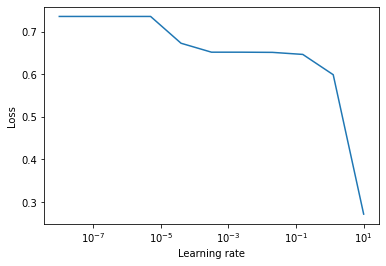

In [ ]:
# plot
(lrs, losses) = find_lr(transfer_model, torch.nn.CrossEntropyLoss(),optimizer, train_data_loader, device=device)
plt.plot(lrs, losses)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## **Differential Learning Rates**

We can normally get a little better accuracy if we try something different: training different groups of layers at different rates.

In [ ]:
transfer_model.to(device)

In [ ]:
log_lrs, losses = find_lr(model=transfer_model, 
                          loss_fn=torch.nn.CrossEntropyLoss(), 
                          optimizer=optimizer, 
                          train_loader=train_data_loader, 
                          device=device)

In [ ]:
optimizer = optim.Adam([
    {'params': transfer_model.layer4.parameters(), 'lr': log_lrs[-1]/3},
    {'params': transfer_model.layer3.parameters(), 'lr': log_lrs[-1]/9},
], lr=log_lrs[-1])

In [ ]:
unfreeze_layers = [transfer_model.layer3, transfer_model.layer4]
for layer in unfreeze_layers:
  for param in layer.parameters():
    param.requires_grad = True

In [ ]:
train(transfer_model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, device=device)

Epoch: 1, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 2, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 3, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 4, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 5, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 6, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 7, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 8, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 9, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 10, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 11, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 12, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 13, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 14, Training Loss: 1.51, Validation Loss: 2.98, accuracy = 0.18
Epoch: 15, Trai

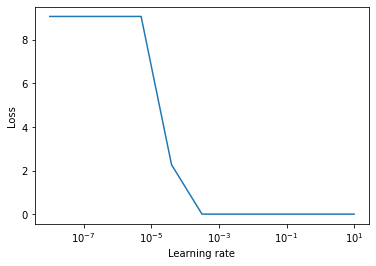

In [ ]:
plt.plot(log_lrs, losses)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## **Data Augmentation**

Data Augmentation is a technique used to **prevent overfitting and make the model more general**.

### **Torchvision Transforms**

`ColorJitter`: randomly changes the brightness, contrast, saturation, and hue of an image.

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

In [ ]:
img = Image.open("/content/images/val/cat/442410088_1da184820c.jpg")

In [ ]:
color_transform = transforms.ColorJitter(brightness=10, 
                                         contrast=10, 
                                         saturation=10, 
                                         hue=0.2)
transformed_img = color_transform(img)

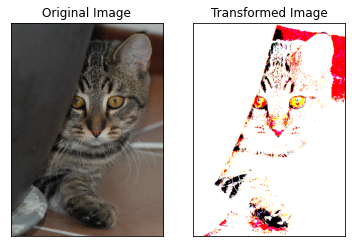

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(transformed_img)
axs[1].set_title("Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Flip image: `RandomHorizontalflip`, `RandomVerticalFlip`

In [ ]:
flip_hor_transform = transforms.RandomHorizontalFlip(p=0.7)                                     
flip_ver_transform = transforms.RandomVerticalFlip(p=0.5)

flip_hor_img = flip_hor_transform(img)
flip_ver_img = flip_ver_transform(img)

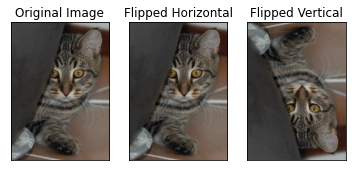

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(flip_hor_img)
axs[1].set_title("Flipped Horizontal")
axs[2].imshow(flip_ver_img)
axs[2].set_title("Flipped Vertical")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomGrayscale`: turns the image grayscale

In [ ]:
grayscale_transform = transforms.RandomGrayscale(p=0.8)
transformed_img = grayscale_transform(img)

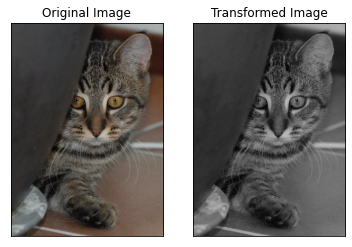

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(transformed_img)
axs[1].set_title("Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

`RandomCrop`, `RandomResizeCrop`: perform random crops on the image of size, which can either be an int for height and width, or a tuple containing different heights and widths.

In [ ]:
from torchvision.transforms import InterpolationMode

crop_transform = transforms.RandomCrop(size=(32, 32), 
                                       padding=None,
                                       pad_if_needed=False, 
                                       fill=0, 
                                       padding_mode='constant')

resize_transform = transforms.RandomResizedCrop(size=(32, 32), 
                                                scale=(0.08, 1.0),
                                                ratio=(0.75, 1.33333333333), 
                                                interpolation=InterpolationMode.BILINEAR)

cropped_img = crop_transform(img)
resized_img = resize_transform(img)

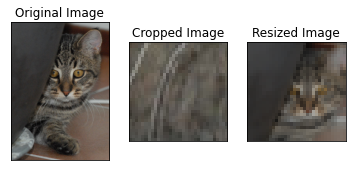

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(cropped_img)
axs[1].set_title("Cropped Image")
axs[2].imshow(resized_img)
axs[2].set_title("Resized Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomRotation` rotate an image

In [ ]:
rotation_transform = transforms.RandomRotation(degrees=180)
rotated_img = rotation_transform(img)

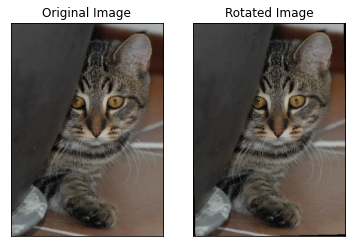

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(rotated_img)
axs[1].set_title("Rotated Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`Pad`: a general-purpose padding transform that adds padding (extra height and width) onto the borders of an image:

In [ ]:
padding_transform = transforms.Pad(padding=10, fill=0, padding_mode='constant')
padded_img = padding_transform(img)

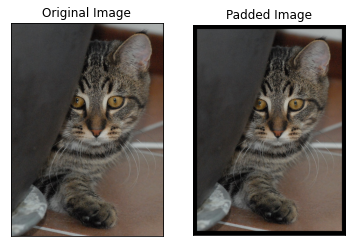

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(padded_img)
axs[1].set_title("Padded Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

`RandomAffine` specify random affine translations of the image (scaling, rotations, translations, and/or shearing, or any combination)

In [ ]:
affine_transform = transforms.RandomAffine(degrees=30, 
                                           translate=(0.1, 0.1), 
                                           scale=(0.9, 1.1), 
                                           shear=10)

affine_img = affine_transform(img)

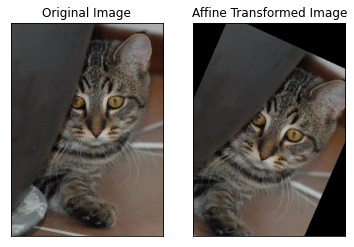

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].imshow(affine_img)
axs[1].set_title("Affine Transformed Image")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### **Color Space and Lambda Transforms**

In [ ]:
def _random_color_space(x):
  output = x.convert("HSV")
  return output

In [ ]:
color_transform = transforms.Lambda(lambda x: _random_color_space(x))
color_image = color_transform(img)

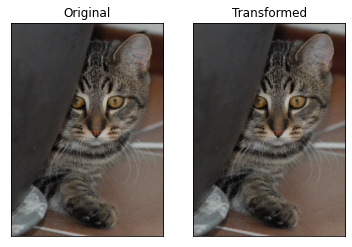

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(color_image)
axs[1].set_title("Transformed")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [ ]:
random_color_transform = transforms.RandomApply([color_transform])
random_color_image = random_color_transform(img)

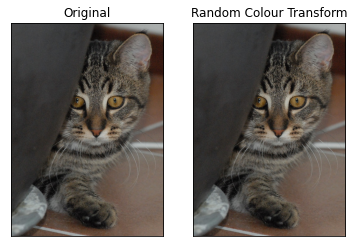

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(random_color_image)
axs[1].set_title("Random Colour Transform")
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### **Custom Transform Classes**

In [ ]:
def _random_color_space(x):
  output = x.convert("HSV")
  return output

In [ ]:
color_transform = transforms.Lambda(lambda x: _random_color_space(x))

In [ ]:
random_color_transform = transforms.RandomApply([color_transform])

In [ ]:
class Noise():
  """Adds gaussian noise to a tensor.

  Example:
    >>> transforms.Compose([
    >>>        transforms.ToTensor(),
    >>>        Noise(0.1, 0.05)),
    ])
  """
  def __init__(self, mean, stddev):
    self.mean = mean
    self.stddev = stddev

  def __call__(self, tensor):
    noise = torch.zeros_like(tensor).normal_(self.mean, self.stddev)
    return tensor.add_(noise)

  def __repr__(self):
    repr = f"{self.__class__.__name__ }(mean={self.mean},stddev={self.stddev})"
    return repr

In [ ]:
custom_transform_pipeline = transforms.Compose([random_color_transform, Noise(0.1, 0.05)])

## **Ensembles**

Combine a **series of models**'s predictions to produce a final answer

In [ ]:
models_ensemble = [models.resnet50().to(device), models.resnet50().to(device)]
predictions = [F.softmax(m(torch.rand(1,3,244,244).to(device)), dim=1) for m in models_ensemble]
avg_prediction = torch.stack(predictions).mean(0).argmax()

In [ ]:
avg_prediction

tensor(264, device='cuda:0')

In [ ]:
torch.stack(predictions)

tensor([[[0.0005, 0.0012, 0.0011,  ..., 0.0008, 0.0003, 0.0011]],

        [[0.0004, 0.0017, 0.0006,  ..., 0.0014, 0.0011, 0.0005]]],
       device='cuda:0', grad_fn=<StackBackward0>)

# <center><b>Chapter 5. Text Classification</b></center>


**Deep learning** has brought significant progress over traditional techniques in natural language processing (NLP), particularly in the area of **text classification**.

In this section, we will examine **recurrent neural networks and embeddings**, and then investigate the **`torchtext`** library and its implementation for **text processing with an LSTM-based model**.

## **Recurrent Neural Networks**

let's have a look at these two sentence fragments:

    The cat sat on the mat.
    She got up and impatiently climbed on the chair, meowing for food.

In CNN, if we feed those two sentences, one after the other, and ask where is the cat?, we'd have a problem, because the **network has no concept of memory**.

This is incredibly important when it comes to dealing with data that has a **temporal domain** (e.g., text, speech, video, and time-series data). **Recurrent neural networks (RNNs)** answer this problem by **giving neural networks a memory via hiden state**.

The process of using a recurrent neural network (RNN) to predict the next item in a sequence. The RNN can be seen as a pipeline of fully connected layers, with **input being fed into each successive layer**. **Backpropagation through time is used to calculate error** on the entire sequence and update the shared parameters of the network. The **gradients are calculated for each time step and summed together** in the process, which involves stepping back through the network's steps to update the shared parameters of the network and calculate the error on the entire sequence.

## **Long Short-Term Memory Networks**

RNNs 'remember' everything forever, which does not resemble human brains. **LSTM's forget gate** sloves this issue that the beginning of the input chain becomes less important over time. **The forget gate parameters are learned during training and determine how much the LSTM forgets**. **The LSTM cell acts as the memory of the network layer**, and **
** This design solves the vanishing gradient problem and allows for any calculation that can be done on a computer with an LSTM.

### **Gated Recurrent Units**

The gated recurrent unit (GRU) **merges the forget gate with the output gate**, resulting in fewer parameters than an LSTM. As a result, it is **quicker to train and uses fewer resources** at runtime. GRUs have become quite popular, partly because they are essentially a drop-in replacement for LSTMs. However, strictly speaking, they are **less powerful than LSTMs** because the merging of the forget and output gates.

### **biLSTM**

The bidirectional LSTMs or biLSTMs are a variant of traditional LSTMs that **allow for the network to look both backwards and forwards in a sequence**, which is important for applications like translation and handwriting recognition. A biLSTM consists of **two stacked LSTMs**, with the **input being sent in the forward direction in one LSTM and reversed in the second**. This allows the network to see the past and the future when making predictions, making it a powerful tool.

PyTorch makes it easy to create biLSTMs by passing in a `bidirectional=True`
parameter when creating an `LSTM()` unit




## **Embeddings**

The simplest approach to convert words or sentences in to tensors is called **one-hot encoding**.

    The cat sat on the mat

we have a tensor of `[the, cat, sat, on, mat]`. One-hot encoding simply means that we create a vector that is the size of the vocabulary, and for each word in it, we allocate a vector with ne parameter set to 1 and the rest to 0:

    the - [1 0 0 0 0]
    cat - [0 1 0 0 0]
    sat - [0 0 1 0 0]
    on  - [0 0 0 1 0]
    mat - [0 0 0 0 1]

then converted the words into vectors, and we can feed them into network. Additionally, we may add extra symbols into our vocabulary, such as `UNK` (unknown, for words not in the vocabulary) and `START/STOP` to signify the beginning and ends of sentences. 

One-hot encoding results in **long and sparse vectors** with very little information and **cannot capture the relationship between words**.

**Embedding matrices** are used to represent words in a lower-dimensional vector space, where **similar words are clustered together**, and distance checks can be used to determine how close words are to each other. The embedding layer is no different from any other layer in a neural network, and its vector space is initialized randomly and updated during training. **Word2vec** is a famous example of pretrained embeddings, which was able to **capture the underlying concepts of words in vector space and make connections between them**. Other pretrained embeddings, such as ELMo, GloVe, and fasttext, have also become available.

As for using embeddings in PyTorch, it’s really simple

In [ ]:
# embed = nn.Embedding(vocab_size, dimension_size)

In [ ]:
# cat_mat_embed = nn.Embedding(5, 2)
# cat_tensor = Tensor([1])
# cat_mat_embed.forward(cat_tensor)

## **torchtext**

PyTorch provides an official library, `torchtext`, for handling text-processing pipelines

## **Getting Our Data: Tweets!**

We are going to build a **sentiment analysis model**.

We will use the **Sentiment140 dataset** which based on tweets from Twitter, with every tweet ranked as 0 for negative, 2 for neutral, and 4
for positive

In [ ]:
!pip install torchtext==0.9.1
!pip install torch==1.8.1

In [ ]:
import spacy
import torchtext
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy import data

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

**Loading & Data Cleaning**

In [ ]:
import pandas as pd

tweetsDF = pd.read_csv("training.1600000.processed.noemoticon.csv",
                       engine="python", header=None, encoding="ISO-8859-1")

In [ ]:
# display the first five rows:
tweetsDF.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
tweetsDF[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

In [ ]:
tweetsDF["sentiment_cat"] = tweetsDF[0].astype('category')
tweetsDF["sentiment"] = tweetsDF["sentiment_cat"].cat.codes
tweetsDF.to_csv("train_processed.csv", header=None, index=None)
tweetsDF.sample(10000).to_csv("train-processed-sample.csv", header=None, index=None)

## **Defining Fields**

<table>
  <tr>
    <th colspan="3"><h4>Field parameter types</h4></th>
  </tr>
  <tr>
    <th>Parameter</th>
    <th>Description</th>
    <th>Default</th>
  </tr>
  <tr>
    <td>sequential</td>
    <td>Whether the field represents sequential data (i.e., text). If set to False, no tokenization is applied</td>
    <td>True</td>
  </tr>
  <tr>
    <td>use_vocab</td>
    <td>Whether to include a Vocab object. If set to False, the field should contain numerical data.</td>
    <td>true</td>
  </tr>
  <tr>
    <td>init_token</td>
    <td>A token that will be added to the start of this field to indicate the beginning of the data.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>eos_token</td>
    <td>End-of-sentence token appended to the end of each sequence.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>fix_length</td>
    <td>If set to an integer, all entries will be padded to this length. If None, sequence lengths will be flexible.</td>
    <td>None</td>
  </tr>
  <tr>
    <td>dtyp</td>
    <td>The type of the tensor batch.</td>
    <td>torch.long</td>
  </tr>
  <tr>
    <td>lower</td>
    <td>Convert the sequence into lowercase.</td>
    <td>False</td>
  </tr>
  <tr>
    <td>tokenize</td>
    <td>The function that will perform sequence tokenization. If set to spacy, the spaCy tokenizer will be used.</td>
    <td>string.split</td>
  </tr>
  <tr>
    <td>pad_token</td>
    <td>The token that will be used as padding.</td>
    <td>&lt;pad&gt;</td>
  </tr>
  <tr>
    <td>unk_token</td>
    <td>The token that will be used to represent words that are not present in the Vocab dict.</td>
    <td>&lt;unk&gt;</td>
  </tr>
  <tr>
    <td>pad_first</td>
    <td>Pad at the start of the sequence</td>
    <td>False</td>
  </tr>
  <tr>
    <td>truncate_first</td>
    <td>Truncate at the beginning of the sequence (if necessary).</td>
    <td>False</td>
  </tr>
</table>

In [ ]:
from torchtext.legacy import data

In [ ]:
device = "cuda"

In [ ]:
LABEL = data.LabelField()
TWEET = data.Field('spacy', tokenizer_language='encore_web_sm', lower=True)

fields = [('score', None), ('id', None), ('data', None), ('query', None),
          ('name', None), ('tweet', TWEET), ('category', None), ('label', LABEL)]

**Create our Dataset and DataLoaders**

`TabularDataset` apply definition to the CSV

In [ ]:
twitterDataset = data.dataset.TabularDataset(
                                              path="train-processed-sample.csv",
                                              format="CSV",
                                              fields=fields,
                                             skip_header=False)

`split` split into training, testing, and validation sets

In [ ]:
(train, test, valid) = twitterDataset.split(split_ratio=[0.6,0.2,0.2],
                                           stratified=True,
                                           strata_field='label')

In [ ]:
(len(train), len(test), len(valid))

(6000, 2000, 2000)

**Building a Vocabulary**

In [ ]:
vocab_size = 20000
TWEET.build_vocab(train, max_size = vocab_size)
LABEL.build_vocab(train)
TWEET.vocab.freqs.most_common(10)  # most common 10 words in the vocablulary

[('i', 2829),
 ('to', 2103),
 ('the', 1923),
 ('a', 1354),
 ('my', 1127),
 ('and', 1037),
 ('you', 900),
 ('is', 891),
 ('for', 795),
 ('in', 787)]

In [ ]:
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                              (train, valid, test),
                                              batch_size = 32,
                                              device = device,
                                              sort_key = lambda x: len(x.tweet),
                                              sort_within_batch = False)

## **Create our Model**

This Model has three layers.
* First the words in our tweets are pushed into an `Embedding` layer, which we have established as a 300-dimensional vector
* Then feed into a `LSTM` with 100 hidden features.
* Finally, the output of the LSTM is pushed through a standard fully connected layer with three outputs to correspond to our three possible classes (negative, positive, or neutral).

In [ ]:
class OurFirstLSTM(nn.Module):
  def __init__(self, hidden_size, embedding_dim, vocab_size):
    super(OurFirstLSTM, self).__init__()
    # Initialize an embedding layer to convert input sequences into dense vectors
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    # Initialize an LSTM layer to encode the embedded sequences into a fixed-size hidden state
    self.encoder = nn.LSTM(input_size=embedding_dim, 
                           hidden_size=hidden_size, num_layers=1)
    # Initialize a linear layer to predict the sentiment label from the hidden state
    self.predictor = nn.Linear(hidden_size, 2)

  def forward(self, seq):
    # Convert input sequence into a dense embedding
    output, (hidden,_) = self.encoder(self.embedding(seq))
    # Use the final hidden state to predict the sentiment label
    preds = self.predictor(hidden.squeeze(0))
    return preds 

In [ ]:
model = OurFirstLSTM(100,300, 20002)
model.to(device)

OurFirstLSTM(
  (embedding): Embedding(20002, 300)
  (encoder): LSTM(300, 100)
  (predictor): Linear(in_features=100, out_features=2, bias=True)
)

**Training**

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [ ]:
# train function 
def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
  ### Train the model
  for epoch in range(1, epochs+1):

    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch_idx, batch in enumerate(train_iterator):
      # Optimizer zero grad
      optimizer.zero_grad()
      # Forward pass
      predict = model(batch.tweet)
      # Calculate loss/accuracy
      loss = criterion(predict,batch.label)
      # Loss backward (backpropagation)
      loss.backward()
      # Optimizer.step()
      optimizer.step()
      training_loss += loss.data.item() * batch.tweet.size(0)
    training_loss /= len(train_iterator)

    ### Evaluate the model on the test set
    model.eval()
    for batch_idx, batch in enumerate(valid_iterator):
      # Forward pass
      predict = model(batch.tweet)
      # Calculate loss/accuracy
      loss = criterion(predict,batch.label)
      valid_loss += loss.data.item() * batch.tweet.size(0)

    valid_loss /= len(valid_iterator)
    print('Epoch: {}, Training Loss: {:.2f}, validation Loss: {:.2f}'
    .format(epoch, training_loss, valid_loss))

In [ ]:
train(5, model, optimizer, criterion, train_iterator, valid_iterator)  

Epoch: 1, Training Loss: 19.61, validation Loss: 9.95
Epoch: 2, Training Loss: 18.65, validation Loss: 11.06
Epoch: 3, Training Loss: 17.07, validation Loss: 13.72
Epoch: 4, Training Loss: 13.98, validation Loss: 11.78
Epoch: 5, Training Loss: 12.27, validation Loss: 13.77


## **Classifying Tweets (Making predictions)**

In [ ]:
def classify_tweet(tweet):
  categories = {0: "Negative", 1: "Positive"}
  processed = TWEET.process([TWEET.preprocess(tweet)])
  processed = processed.to(device)
  model.eval()
  return categories[model(processed).argmax().item()]

In [ ]:
tweet = "Some people choose to see the ugliness in this world. The disarray."
sentiment = classify_tweet(tweet)
print(sentiment)

Negative


In [ ]:
tweet = "I am in a dream"
sentiment = classify_tweet(tweet)
print(sentiment)

Positive


## **Data Augmentation**

### **Random Insertion**

A random insertion technique looks at a sentence and then randomly inserts synonyms of existing nonstop-words into the sentence n times.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [ ]:
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
from nltk.corpus import wordnet

In [ ]:
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

In [ ]:
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name() != word:
                synonyms.append(lemma.name())
    return list(set(synonyms))

In [ ]:
import random
from random import randrange

In [ ]:
def random_insertion(sentence, n):
    words = remove_stopwords(sentence.split())
    for _ in range(n):
        if words:
            rand_index = randrange(len(words))
            word = words[rand_index]
            synonyms = get_synonyms(word)
            if synonyms:
                new_word = random.choice(synonyms)
                words[rand_index] = new_word
    return ' '.join(words)

In [ ]:
sentence = "I eat a chocolate cake"
new_sentence = random_insertion(sentence, 3)
print(new_sentence)

I deplete coffee coat


## **Random Deletion**

Random deletion deletes words from a sentence based on that random probability

In [2]:
import random

In [1]:
def random_deletion(words, p=0.5):
  if len(words) == 1:
    return words
  remaining = list(filter(lambda x: random.uniform(0, 1) > p, words))
  if len(remaining) == 0:
    return [random.choice(words)]
  else:
    return remaining

In [6]:
sentence = "I eat a chocolate cake"
words = sentence.split()
new_words = random_deletion(words, p=0.3)
new_sentence = " ".join(new_words)
print(new_sentence)

I eat


## **Random Swap**

Random swap augmentation takes a sentence and then swaps words within it n times.

In [7]:
def random_swap(sentence, n=5):
  length = range(len(sentence))
  for _ in range(n):
    idx1, idx2 = random.sample(length, 2)
    sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1]
  return sentence

In [12]:
sentence = "I eat a chocolate cake"
new_sequence = random_swap(sentence.split(), 3)
new_sentence = " ".join(new_sequence)
print(new_sentence)

I chocolate eat cake a


## **Back Translation**

Back translation is translating a sentence from our target language into one or more other languages and then translating all of them back to the original language.

In [ ]:
!pip install googletrans==3.1.0a0

In [18]:
import googletrans
import random

translator = googletrans.Translator()

sentences = ['The cat sat on the mat']

translations_fr = translator.translate(sentences, dest='fr')
fr_text = [t.text for t in translations_fr]
translations_en = translator.translate(fr_text, dest='en')
en_text = [t.text for t in translations_en]
print(f"english->french->english    : {en_text[0]}")

available_langs = list(googletrans.LANGUAGES.keys())
tr_lang = random.choice(available_langs)
print(f"Translating to {googletrans.LANGUAGES[tr_lang]}")

translations = translator.translate(sentences, dest=tr_lang)
t_text = [t.text for t in translations]
print(f"english->{googletrans.LANGUAGES[tr_lang]}   : {t_text[0]}")

translations_en_random = translator.translate(t_text, src=tr_lang, dest='en')
en_text = [t.text for t in translations_en_random]
print(f"{googletrans.LANGUAGES[tr_lang]}->english   : {en_text[0]}")

english->french->english    : The cat sat on the carpet
Translating to esperanto
english->esperanto   : La kato sidis sur la mato
esperanto->english   : The cat was sitting on the mat
